In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import scanpy as sc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from scipy.io import arff
import ntpath
import glob
import os
import sys
import math
import statistics

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
file_name = 'FB'

In [ ]:
import pickle
with open(gdrivePath +os.sep+"results"+os.sep+"FB"os.sep+file_name+'_X_train.pkl', 'rb') as f:
    X_train_gen = pickle.load(f)
with open(gdrivePath +os.sep+"results"+os.sep+"FB"+os.sep+file_name+'_X_test.pkl', 'rb') as f:
    X_test_gen = pickle.load(f)
with open(gdrivePath +os.sep+"results"+os.sep+"FB"+os.sep+file_name+'_y_train.pkl', 'rb') as f:
    y_train_gen = pickle.load(f)
with open(gdrivePath +os.sep+"results"+os.sep+"FB"+os.sep+file_name+'_y_test.pkl', 'rb') as f:
    y_test_gen = pickle.load(f)
with open(gdrivePath +os.sep+"results"+os.sep+"FB"+os.sep+file_name+'_y_train_idx.pkl', 'rb') as f:
    y_train_idx = pickle.load(f)

In [ ]:
degs_file_path = gdrivePath + os.sep + "results" + os.sep + "DGE"+ os.sep +"test"+ os.sep +'Cellphonedb_DEGs_mask.tsv'
DEGs = pd.read_csv(degs_file_path, sep = '\t')
DEGs

,cell_type,gene,logFC,P.Value,adj.P.Val,pct.1,pct.2
0,PSC,RCN3,6.608999,2.055261e-20,1.544323e-16,1.000,0.066
1,PSC,DCN,7.155906,8.463581e-19,6.359535e-15,0.909,0.029
2,PSC,LUM,6.500879,5.332860e-18,4.007111e-14,0.909,0.032
3,PSC,MMP2,6.394307,7.222255e-16,5.426802e-12,0.909,0.039
4,PSC,MXRA8,6.442274,2.587146e-15,1.943982e-11,0.909,0.025
...,...,...,...,...,...,...,...
5504,quiescent_stellate,LAMA4,3.212247,3.411085e-06,2.563089e-02,0.257,0.046
5505,quiescent_stellate,PCDH18,5.193001,3.689650e-06,2.772403e-02,0.143,0.015
5506,quiescent_stellate,TRPC4,4.717168,4.920139e-06,3.696992e-02,0.171,0.038
5507,quiescent_stellate,OSMR,3.005425,5.037198e-06,3.784950e-02,0.371,0.136


In [ ]:
top_5_markers = DEGs.groupby('cell_type').head(5)
top_5_markers

,cell_type,gene,logFC,P.Value,adj.P.Val,pct.1,pct.2
0,PSC,RCN3,6.608999,2.055261e-20,1.544323e-16,1.000,0.066
1,PSC,DCN,7.155906,8.463581e-19,6.359535e-15,0.909,0.029
2,PSC,LUM,6.500879,5.332860e-18,4.007111e-14,0.909,0.032
3,PSC,MMP2,6.394307,7.222255e-16,5.426802e-12,0.909,0.039
4,PSC,MXRA8,6.442274,2.587146e-15,1.943982e-11,0.909,0.025
...,...,...,...,...,...,...,...
5285,quiescent_stellate,NDUFA4L2,8.256273,7.016865e-50,5.272472e-46,0.829,0.044
5286,quiescent_stellate,KLF9,6.021309,5.133459e-47,3.857281e-43,0.943,0.196
5287,quiescent_stellate,RGS5,9.237514,2.426172e-42,1.823026e-38,0.743,0.074
5288,quiescent_stellate,IGFBP4,5.572777,4.640415e-40,3.486808e-36,0.914,0.111


In [ ]:
X_train_gen.shape, y_train_gen.shape, X_test_gen.shape, y_test_gen.shape

((18405, 7514), (18405,), (2835, 7514), (2835,))

In [ ]:
original_samples = X_train_gen[y_train_idx == 1]
generated_samples = X_train_gen[y_train_idx == 2]
y_train_original = y_train_gen[y_train_idx == 1]
y_train_generated = y_train_gen[y_train_idx == 2]

In [ ]:
print(generated_samples.shape, y_train_generated.shape)

(7068, 7514) (7068,)


In [ ]:
unique_values, counts = np.unique(y_train_generated, return_counts=True)
display(dict(zip(unique_values, counts)),np.sum(counts))

{'PSC': 717,
 'activated_stellate': 532,
 'endothelial': 528,
 'epsilon': 742,
 'gamma': 420,
 'macrophage': 715,
 'mast': 739,
 'mesenchymal': 695,
 'pp': 611,
 'quiescent_stellate': 621,
 'schwann': 748}

7068

In [ ]:
idx1 = np.where(y_test == "alpha")[0]
idx2 = np.where(y_test == "acinar")[0]
idx3 = np.where(y_test == "beta")[0]
idx4 = np.where(y_test == "delta")[0]
idx5 = np.where(y_test == "ductal")[0]
combined_indices = np.concatenate((idx1, idx2, idx3, idx4,idx5))
all_indices = np.arange(len(y_test))
indices_to_keep = np.setdiff1d(all_indices, combined_indices)
X_test_genClass = X_test.iloc[indices_to_keep]
y_test_genClass = y_test[indices_to_keep]

In [ ]:
print(X_test_genClass.shape,y_test_genClass.shape)

(321, 7514) (321,)


-----------

In [ ]:
unique_values, counts = np.unique(y_test_genClass, return_counts=True)
display(dict(zip(unique_values, counts)),np.sum(counts))

{'PSC': 11,
 'activated_stellate': 57,
 'endothelial': 58,
 'epsilon': 4,
 'gamma': 85,
 'macrophage': 11,
 'mast': 5,
 'mesenchymal': 16,
 'pp': 37,
 'quiescent_stellate': 35,
 'schwann': 2}

321

In [ ]:
idx1 = np.where(y_train == "alpha")[0]
idx2 = np.where(y_train == "acinar")[0]
idx3 = np.where(y_train == "beta")[0]
idx4 = np.where(y_train == "delta")[0]
idx5 = np.where(y_train == "ductal")[0]
combined_indices = np.concatenate((idx1, idx2, idx3, idx4,idx5))
all_indices = np.arange(len(y_train))
indices_to_keep = np.setdiff1d(all_indices, combined_indices)
X_train_genClass = X_train.iloc[indices_to_keep]
y_train_genClass = y_train[indices_to_keep]

In [ ]:
print(X_train_genClass.shape,y_train_genClass.shape )

(1281, 7514) (1281,)


In [ ]:
unique_values, counts = np.unique(y_train_genClass, return_counts=True)
display(dict(zip(unique_values, counts)),np.sum(counts))

{'PSC': 42,
 'activated_stellate': 227,
 'endothelial': 231,
 'epsilon': 17,
 'gamma': 339,
 'macrophage': 44,
 'mast': 20,
 'mesenchymal': 64,
 'pp': 148,
 'quiescent_stellate': 138,
 'schwann': 11}

1281

In [ ]:
generated_samples.shape

(7068, 7514)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_samples_with_test(original_samples, generated_samples, test_samples, y_train_ori, y_train_generate, y_test,file_name):
    # Perform PCA on the concatenated samples
    combined_samples = np.vstack([original_samples, generated_samples, test_samples])
    pca = PCA(n_components=2)
    pca.fit(combined_samples)

    # Transform original, generated, and test samples to 2D
    original_samples_2d = pca.transform(original_samples)
    generated_samples_2d = pca.transform(generated_samples)
    test_samples_2d = pca.transform(test_samples)

    # Plot the samples
    unique_labels = np.unique(np.concatenate((y_train_ori, y_train_generate, y_test)))
    colors = plt.cm.get_cmap('tab20', len(unique_labels))

    label_color_map = {label: colors(i) for i, label in enumerate(unique_labels)}

    plt.figure(figsize=(10, 10))

    # Plot original samples
    for label in np.unique(y_train_ori):
        plt.scatter(
            original_samples_2d[y_train_ori == label, 0],
            original_samples_2d[y_train_ori == label, 1],
            label=f'Original {label}',
            marker='x',
            color=label_color_map[label],
            s=20
        )

    # Plot generated samples
    for label in np.unique(y_train_generate):
        plt.scatter(
            generated_samples_2d[y_train_generate == label, 0],
            generated_samples_2d[y_train_generate == label, 1],
            label=f'Generated {label}',
            marker='o',
            color=label_color_map[label],
            s=20
        )

    # Plot test samples
    for label in np.unique(y_test):
        plt.scatter(
            test_samples_2d[y_test == label, 0],
            test_samples_2d[y_test == label, 1],
            label=f'Test {label}',
            marker='^',
            color=label_color_map[label],
            s=20
        )

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Visualization of Original, Generated, and Test Samples')
    #plt.legend(loc='lower left')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.show()
    plt.savefig(gdrivePath +os.sep+"figures"+os.sep+"distributionGraphs"+os.sep+file_name)



GC

<ipython-input-15-6a2dfcbcd51f>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_labels))


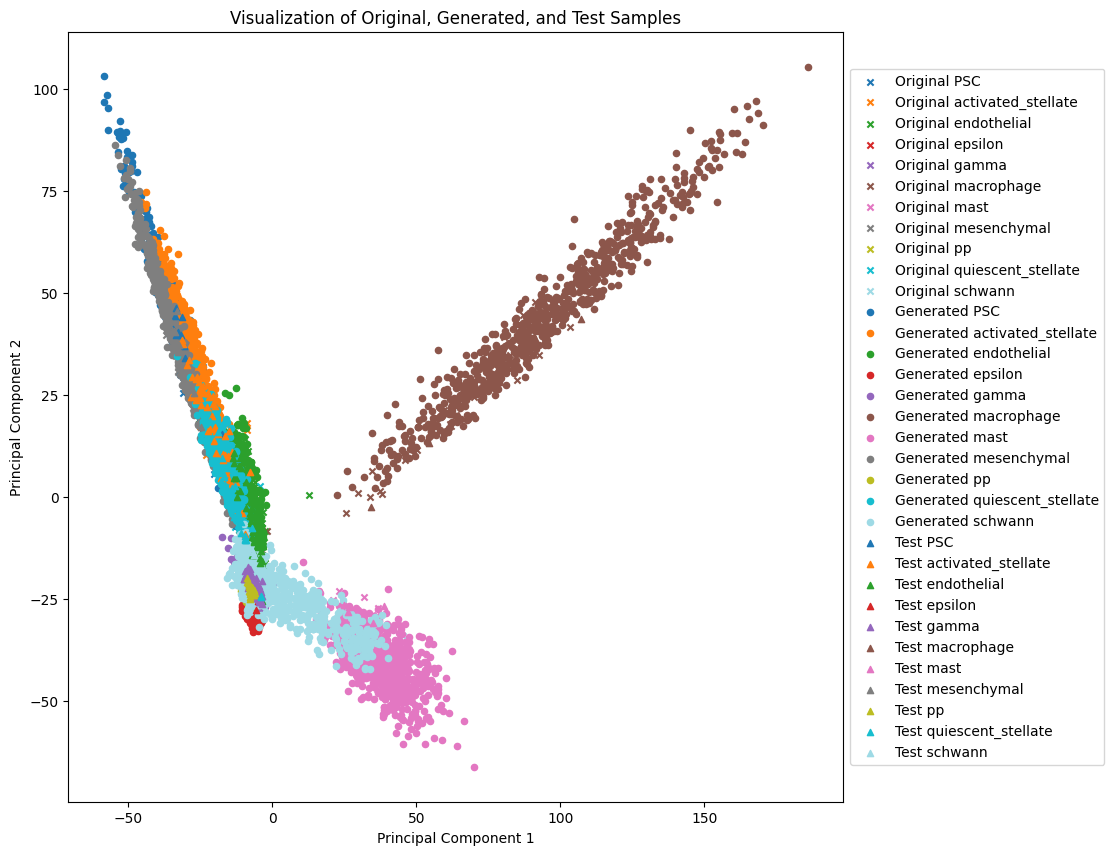

In [ ]:
visualize_samples_with_test(original_samples_genClass,generated_samples,test_samples_genClass,y_train_genClass,y_train_generated,y_test_genClass,"original_GC.svg")

TVAE

<ipython-input-15-6a2dfcbcd51f>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_labels))


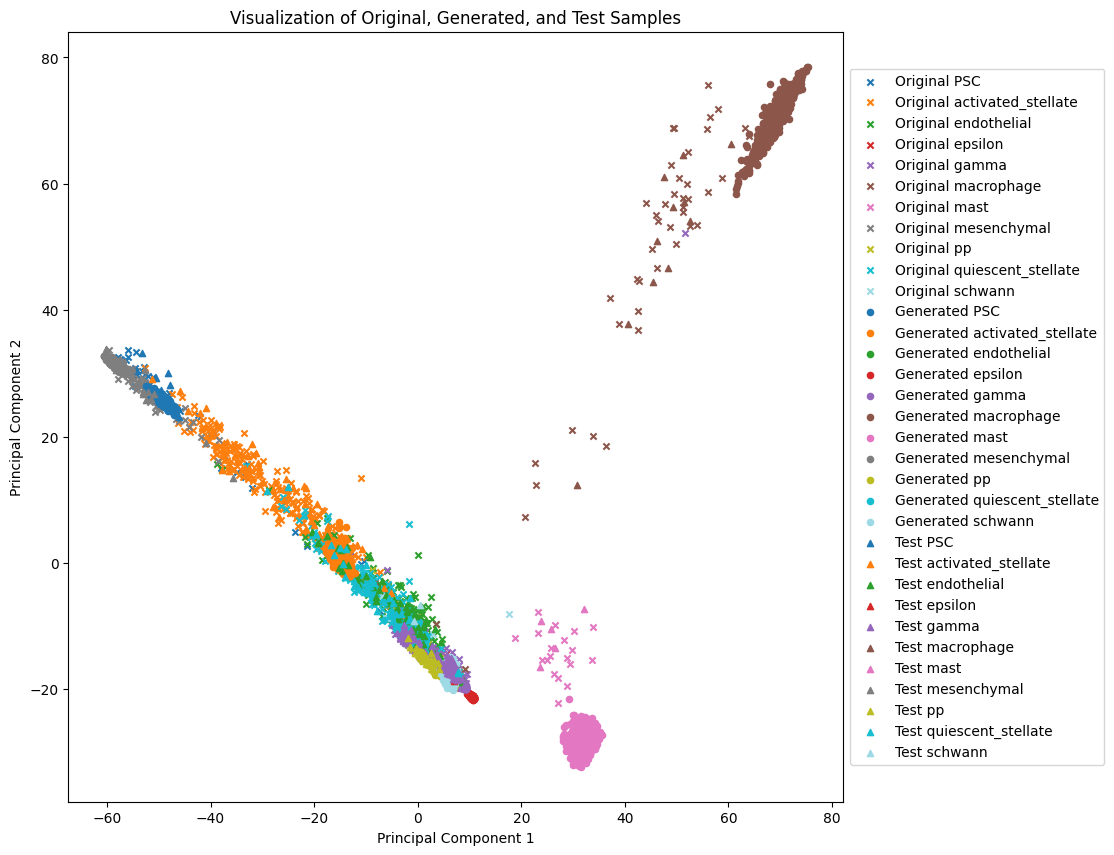

In [ ]:
visualize_samples_with_test(original_samples_genClass,generated_samples,test_samples_genClass,y_train_genClass,y_train_generated,y_test_genClass,"original_TVAE.svg")

CTGAN

<ipython-input-26-6a2dfcbcd51f>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_labels))


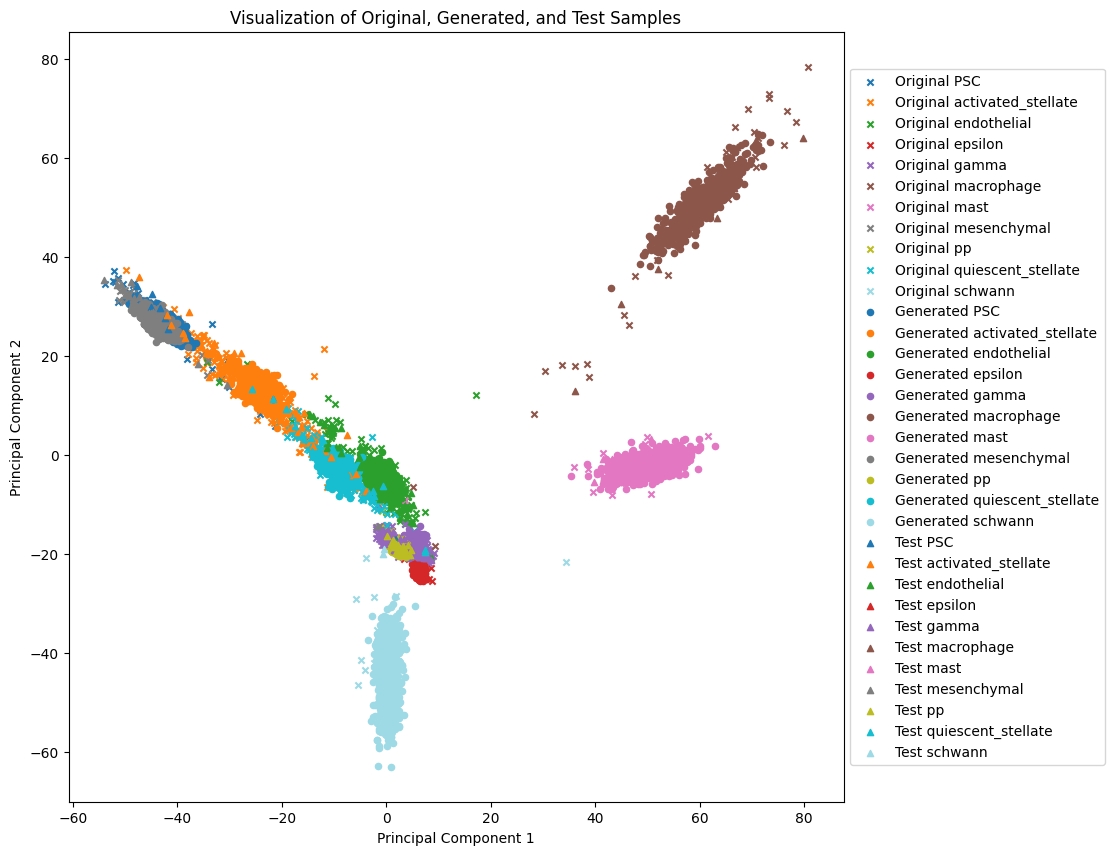

In [ ]:
visualize_samples_with_test(original_samples_genClass,generated_samples,test_samples_genClass,y_train_genClass,y_train_generated,y_test_genClass,"original_CTGAN.svg")

FB

<ipython-input-14-6a2dfcbcd51f>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_labels))


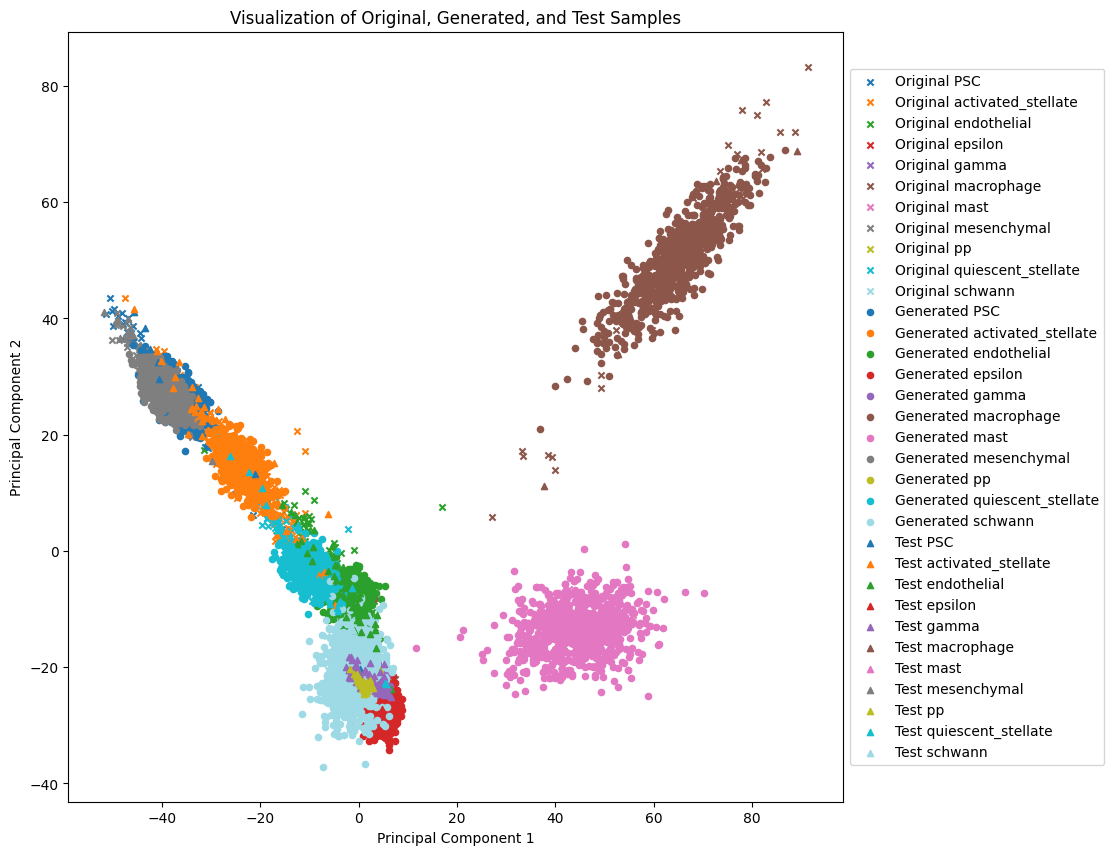

In [ ]:
visualize_samples_with_test(original_samples_genClass,generated_samples,test_samples_genClass,y_train_genClass,y_train_generated,y_test_genClass,"original_FB.svg")

Violin Plots

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def violin_plot_one(X, y, top_markers):
    # Add `cell_type` to the dataset
    X['cell_type'] = y
    data = X

    # Flatten all markers into a single list
    all_genes = top_markers.values.flatten()

    # Calculate rows and columns for subplots
    num_genes = len(all_genes)
    cols = 5  # Set the number of columns
    rows = (num_genes + cols - 1) // cols  # Compute rows dynamically

    # Create a grid of subplots
    fig, axes = plt.subplots(rows, cols, figsize=(25, rows * 5), sharey=True)

    # Flatten axes array for easier indexing
    axes = axes.flatten()

    # Loop through each gene and create a violin plot
    for i, gene in enumerate(all_genes):
        sns.violinplot(x='cell_type', y=gene, data=data, ax=axes[i], palette='Set2', inner='quartile')
        axes[i].set_title(gene, fontsize=10)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Set the common y-axis label
    fig.text(0.01, 0.5, 'Gene Expression', ha='center', va='center', rotation='vertical', fontsize=14)

    # Set a common x-axis label
    fig.text(0.5, 0.04, 'Cell Type', ha='center', va='center', fontsize=14)

    # Set the main title
    fig.suptitle('Gene Expression Across Cell Types', fontsize=18)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0.03, 0.05, 1, 0.95])

    # Save the figurec
    plt.savefig(os.path.join(gdrivePath, "figures", "violinPlots", "test_allclass_violinPlot_combined.svg"))

    # Show the plot (optional)
    plt.show()


In [ ]:
# Reshape the column into 16 rows and 5 columns
reshaped_array = top_5_markers['gene'].to_numpy().reshape(15, 5)  # Convert to NumPy and reshape
top_5_markers_file = pd.DataFrame(reshaped_array, columns=[f'Col{i+1}' for i in range(5)])  # Convert back to DataFrame

# Display the reshaped DataFrame
top_5_markers_file

,Col1,Col2,Col3,Col4,Col5
0,RCN3,DCN,LUM,MMP2,MXRA8
1,CPA2,PRSS1,REG1A,CTRB2,CTRC
2,COL6A2,BGN,COL6A3,TIMP1,COL6A1
3,IRX2,GC,TM4SF4,TMEM176B,GCG
4,ADCYAP1,IAPP,INS,HADH,PCSK1
5,SST,RBP4,LEPR,BCHE,HHEX
6,KRT19,TACSTD2,KRT7,S100A14,SERPING1
7,PLVAP,PECAM1,CD93,ESAM,FLT1
8,GHRL,ACSL1,FRZB,TRNP1,PLAC8
9,PPY,AQP3,SERTM1,CARD11,ETV1


<ipython-input-42-4ace5002e085>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cell_type', y=gene, data=data, ax=axes[i], palette='Set2', inner='quartile')
<ipython-input-42-4ace5002e085>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cell_type', y=gene, data=data, ax=axes[i], palette='Set2', inner='quartile')
<ipython-input-42-4ace5002e085>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cell_type', y=gene, data=data, ax=axes[i], palette='Set2', inner='quartile')
<ipython-input-42-4ace5002e085>:30: FutureWarning: 


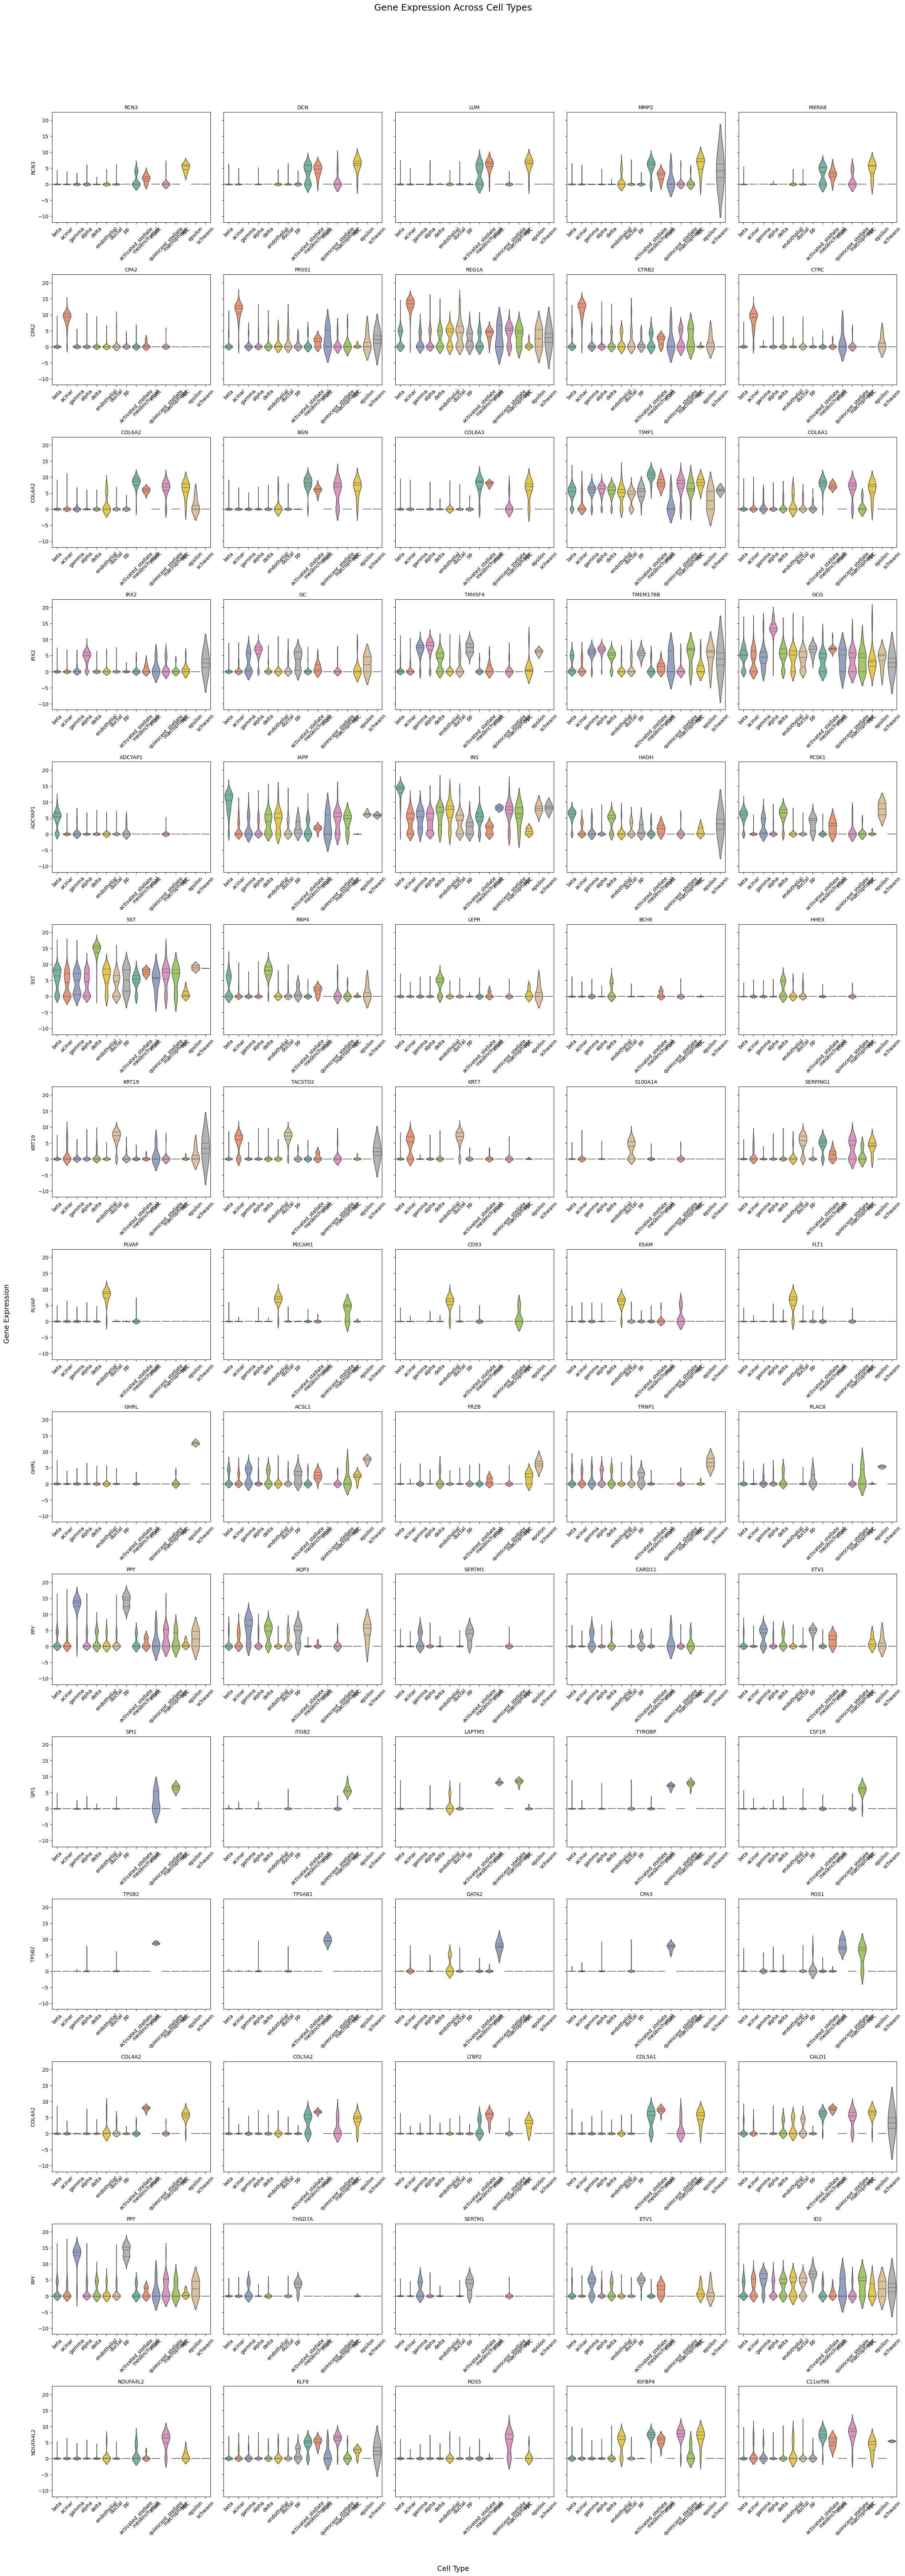

In [ ]:
violin_plot_one(X_test, y_test, top_5_markers_file)

Correlation Discrepancy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def correlation_matrix(markers, data1,data2):

  data1_df = pd.DataFrame(data1, columns = data2.columns)
  markers = markers['gene'].tolist()

  genes = markers
  generated_data = data1_df
  real_data = data2

  generated_data = generated_data[genes]
  real_data = real_data[genes]

  # 1. Calculate correlation matrices for both generated and real data
  corr_generated = generated_data.corr(method='pearson')
  corr_real = real_data.corr(method='pearson')

  # 2. Calculate the Correlation Discrepancy (Difference between real and generated correlations)
  correlation_discrepancy = np.abs(corr_real - corr_generated)

  # 3. Calculate the mean discrepancy as a summary metric
  mean_discrepancy = correlation_discrepancy.mean().mean()
  print(f"Mean Correlation Discrepancy: {mean_discrepancy:}")



In [ ]:
correlation_matrix(top_5_markers, X_train,X_test)#cellphonedb test DEG all classes

Mean Correlation Discrepancy: 0.01489839540099748


In [ ]:
correlation_matrix(top_5_markers, X_train_gen,X_test) #FB

Mean Correlation Discrepancy: 0.05114085629954594


In [ ]:
correlation_matrix(top_5_markers, X_train_gen,X_test) #ctGAN

Mean Correlation Discrepancy: 0.05897401222381312


In [ ]:
correlation_matrix(top_5_markers, X_train_gen,X_test) #TVAE

Mean Correlation Discrepancy: 0.09020375636878757


In [ ]:
correlation_matrix(top_5_markers, X_train_gen,X_test) #GC

Mean Correlation Discrepancy: 0.1602377179881134
